# Task 1

### Import data and plot the chart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_df = pd.read_csv("p3_task-1.csv")

# Print shape
print("Shape:", data_df.shape)

Shape: (50, 2)


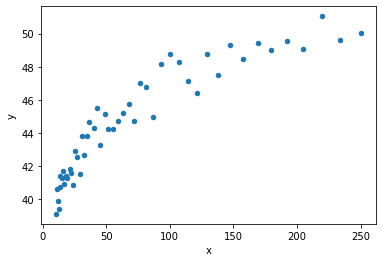

In [2]:
# Extract x, y data
x = data_df.iloc[:, 0].values  # Temperatures
y = data_df.iloc[:, 1].values  # Consumption

# Plot data
%matplotlib inline
import matplotlib.pyplot as plt

data_df.plot.scatter("x", "y")
plt.show()

### Define a new Variable Log(x)

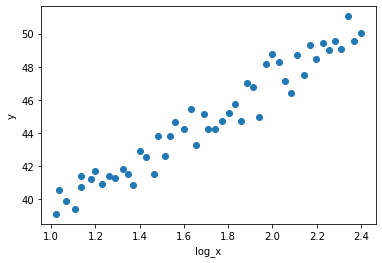

In [3]:
## Define a new Variable Log(x)
log_x = np.log10(x)

plt.scatter(log_x, y)
plt.xlabel("log_x")
plt.ylabel("y")
plt.show()

### Fit a model to the new data
The scatter plot above shows a linearity between log_x and y. I suggest to build a linear regression model with the polyfit function

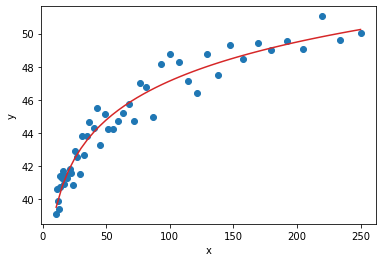

In [4]:
coefs = np.polyfit(log_x, y, deg=1)
# Generate data points
x_values = np.linspace(x.min(), x.max(), num=x.shape[0])
# Compute predictions
y_pred = np.polyval(coefs, np.log10(x_values))
# Plot predictions
#data_df.plot.scatter("x", "y")
plt.scatter(x, y)
plt.plot(x_values, y_pred, c="C3", label="linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Compute RSS and R2 measures

In [5]:
# Compute RSS
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

In [6]:
model_rss = RSS(y, y_pred)
print("RSS value:", model_rss)

RSS value: 419.41828799582163


In [7]:
# RSS of the baseline
rss_baseline = RSS(y, y.mean())
print("RSS baseline:", rss_baseline)

RSS baseline: 541.1432872199999


In [8]:
# R^2 coefficient
R2 = 1 - (model_rss / rss_baseline)
print("R^2 coefficient:", R2)  

R^2 coefficient: 0.22494042169406314


*Comments:* The coefficient of determination (R2) is closer to 0 than 1 which mean than the model performs slightly better than the baseline. It is not a good score and this model needs to be improved. 

# Task 2

The goal is to build 3 models and compare different approaches to handle outliers:

- A linear regression to the data with outliers,
- A huber regression to the data with outliers,
- A linear regression to the data without outliers.

You should

Start by using the train/test split methodology (e.g. 80-20 splits) to create a test set and keep it aside.
Plot the training data to get a quick overview of the data.
Build and apply a cleaning strategy to remove outliers from the training data.
Finally compare the test MAE scores for your 3 models and comment.
Note that we don’t remove outliers from the test data. This ensures that we use the same test data each time and thus the evaluations of the models are consistent.

The linear regression without outliers and huber regression models should both perform better than the linear regression with outliers.

In [9]:
# Load the data
data_df_2 = pd.read_csv("p3_task-2.csv")

# Print shape
print("Shape:", data_df_2.shape)
data_df_2

Shape: (1000, 4)


,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604
...,...,...,...,...
995,7.573,305.690,150.542,2033.060
996,5.948,331.843,182.158,2101.776
997,7.568,385.722,159.005,2429.810
998,15.332,335.927,166.665,2431.463


In [10]:
# Extract values from the dataframe
X = data_df_2.iloc[:,0:3].values
y = data_df_2.y.values
X.shape, y.shape

((1000, 3), (1000,))

In [11]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te =train_test_split(X, y, test_size=0.2)
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((800, 3), (200, 3), (800,), (200,))

### Plot training data to get an overview of the dataset

In [12]:
x1_tr = X_tr[:, 0]
x2_tr = X_tr[:, 1]
x3_tr = X_tr[:, 2]

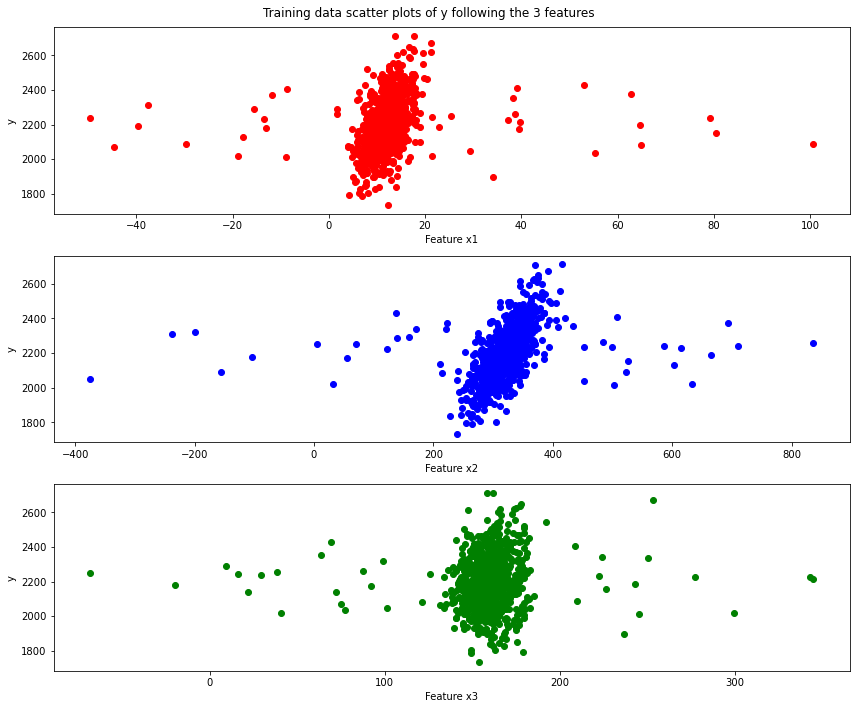

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,10), sharey=True)
fig.suptitle("Training data scatter plots of y following the 3 features")

# First chart
axs[0].scatter(x1_tr, y_tr, color='r')
axs[0].set_xlabel('Feature x1')
axs[0].set_ylabel('y')

# Second chart
axs[1].scatter(x2_tr, y_tr, color='b')
axs[1].set_xlabel('Feature x2')
axs[1].set_ylabel('y')

# Third chart
axs[2].scatter(x3_tr, y_tr, color='g')
axs[2].set_xlabel('Feature x3')
axs[2].set_ylabel('y')

plt.tight_layout()
plt.show()

**Comments:** We can see that the 3 features have most of their data points into specific range of values (ex: X1 between 0 and 20, X2 between 200 and 400) and data points outside this range which are outliers.

### Cleaning strategy to remove outliers

**Comments:** As it is quite easy to identify outliers on the plot above, we will remove them by hand using the following values:
- Feature X1: 0 and 25
- Feature X2: 200 and 450
- Feature X3: 100 and 200

In [14]:
outliers = np.logical_or.reduce((np.logical_or(x1_tr < 0, x1_tr > 25),
              np.logical_or(x2_tr < 200, x2_tr > 450), np.logical_or(x3_tr < 100, x3_tr > 200)))

In [15]:
x1_tr_o, y_tr_o = x1_tr[~outliers], y_tr[~outliers]
x2_tr_o, y_tr_o = x2_tr[~outliers], y_tr[~outliers]
x3_tr_o, y_tr_o = x3_tr[~outliers], y_tr[~outliers]
X_tr_o = np.column_stack((x1_tr_o, x2_tr_o, x3_tr_o))
x1_tr_o.shape, x2_tr_o.shape, x3_tr_o.shape, y_tr_o.shape, X_tr_o.shape

((757,), (757,), (757,), (757,), (757, 3))

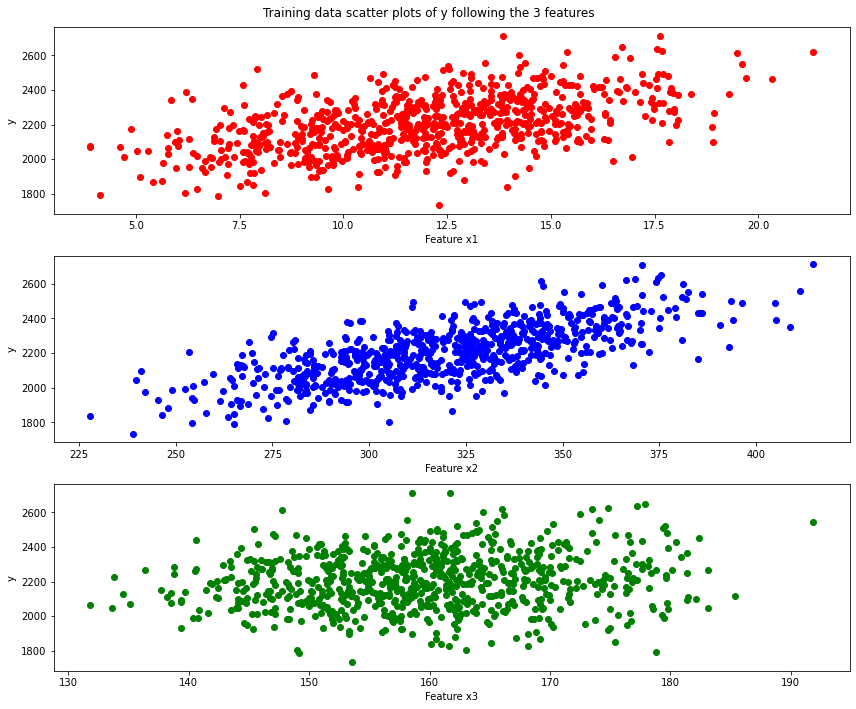

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,10), sharey=True)
fig.suptitle("Training data scatter plots of y following the 3 features")

# First chart
axs[0].scatter(x1_tr_o, y_tr_o, color='r')
axs[0].set_xlabel('Feature x1')
axs[0].set_ylabel('y')

# Second chart
axs[1].scatter(x2_tr_o, y_tr_o, color='b')
axs[1].set_xlabel('Feature x2')
axs[1].set_ylabel('y')

# Third chart
axs[2].scatter(x3_tr_o, y_tr_o, color='g')
axs[2].set_xlabel('Feature x3')
axs[2].set_ylabel('y')

plt.tight_layout()
plt.show()

### Build models

In [17]:
# Build linear regression model
from sklearn.linear_model import LinearRegression

# Create linear regression
linreg = LinearRegression()

In [18]:
# Huber loss
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(epsilon=1)

### Fit models with train data with outliers

In [19]:
# Fit it
linreg.fit(X_tr, y_tr)
# Compute predictions for test data points
y_reg = linreg.predict(X_te)

In [20]:
# Fit Huber model
huber.fit(X_tr, y_tr)
# Compute predictions for test data points
y_hub = huber.predict(X_te)

### Fit models with train data without outliers

In [21]:
# Fit it
linreg_o = linreg.fit(X_tr_o, y_tr_o)
# Compute predictions for test data points
y_reg_o = linreg_o.predict(X_te)

In [22]:
# Fit Huber model
huber_o = huber.fit(X_tr_o, y_tr_o)
# Compute predictions for test data points
y_hub_o = huber.predict(X_te)

### Evaluate Models

In [23]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [24]:
mae_reg = MAE(y_te, y_reg)  # linear regression
mae_huber = MAE(y_te, y_hub) # huber 
mae_reg_o = MAE(y_te, y_reg_o) # linear regression without outliers
mae_huber_o = MAE(y_te, y_hub_o) # huber without outliers
print("MAE linear regression: {:.3f}".format(mae_reg))
print("MAE Huber: {:.3f}".format(mae_huber))
print("MAE linear regression without outliers: {:.3f}".format(mae_reg_o))
print("MAE Huber without outliers: {:.3f}".format(mae_huber_o))

MAE linear regression: 111.926
MAE Huber: 88.733
MAE linear regression without outliers: 89.961
MAE Huber without outliers: 89.644


**Comments:** the linear regression model without outliers improve the score than the same model with outliers. The huber model shows the best score. 